# 01. Introdução

 <p> A lavagem de dinheiro é um crime financeiro que envolve a dissimulação da origem ilícita de fundos, tornando-os aparentemente legítimos. É uma atividade complexa e prejudicial que afeta diretamente a estabilidade econômica e a integridade dos sistemas financeiros em todo mundo. Como resposta a esse problema, os orgãos reguladores e as instituições financeiras têm se empenhado em implementar medidas efetivas de prevenção a lavagem de dinheiro. </p>
 
  A análise de dados desempenha um papel fundamental nesse esforço, oferecendo uma abordagem baseada em evidências para identificar e mitigar atividades suspeitas. Por meio da utilização de técnicas é possivel identificar transações potencialmente ilícitas.
 
 

**Exemplo Fictício:**

O cenário abaixo é um exemplo ficticio para demonstrar o processo. **Os dados utilizidados aqui são fictícios e não deve ser considerados como informações reais.**

# 02. Processo de ETL com Integration Service

**Sobre ETL:** ETL é uma sigla que representa as três etapas fundamentais de um processo de integração de dados: Extração(Extraction), Transformação(Transformation) e Carga(Loading). É um processo usado para coletar dados de diferentes fontes, transformá-los em um formato adequado e carregá-los em um local destino, como um data warehouse, banco de dados ou outro sistema de armazenamento.

**Sobre Integration Service:** É um componente que faz parte de uma plataforma de integração de dados, como o Microsoft SQL Integration Service (SSIS) ou o Informatica PowerCenter. Ele desempenha um papel fundamental na execução de processos ETL e no gerenciamento do fluxo de dados entre diferentes fontes e destinos.

Por meio de interface gráfica intuitiva, o Integration Service facilita a criação e a organização dos componentes do fluxo de trabalho, como conexões com fonte de dados, transformações, tarefas de controle de fluxo e configurações de carga. 

## 02.01 Extração:

Para a extração das informações vamos utilizar nesse exemplo um arquivo .csv

Esse arquivo contem as informações do cliente e operações realizadas pela instituição em (D-1)(dia menos um, em tradução livre) 
e é usado para indicar que os dados utilizados em uma determinada análise ou processamento são referentes ao dia anterior ao 
dia atual.

**Exemplo de Arquivo:**

<img src="Exemplo_Dados_2.GIF" alt="Texto Alternativo">


**Fluxo de Extração e Carga de Dados:**

**Principais Etapas do Pacote DTSX:**

1. Limpeza da Tabela temporaria.

<img src="Fluxo_Limpeza_Dados.GIF" alt="Texto Alternativo"> 

2. Fluxo de Leitura do Arquivo Origem e Carga na Tabela Destino

<img src="Fluxo_Dados.GIF" alt="Texto Alternativo"> 

3. Executar Procedure para atualização dos dados.

<img src="Procedure_Carga_Procedure.GIF" alt="Texto Alternativo"> 


**Conclusão:** Após a execução da carga são alimentadas as tabelas relacionadas a clientes e operações realizadas em (D-1) dia anterior ao dia atual.

# 03. Execução de Regra

Nesse exemplo vamos utilizar a execução de uma regra para separa as operações de altos valores.

### 03.01 Execução de Movimentação de Altos Valores

O objetivo da Procedure é verificar movimentações de valor igual ou superior ao Parametro01 que é definido pelo Compliance da instituição financeira.

<img src="Mov_Altos_Valores.GIF" alt="Texto Alternativo"> 


<img src="Criar_TabelaTemporaria.GIF"> 

Verifica as operações de alto valor noo periodo analisado.

<img src="Verifica_Operacoes_AltosValores.GIF"> 

**Conclusão:** Após a analise as movimentações de altos valores são separadas em tabelas apartadas para posterior verificação das áreas responsáveis da instituição.

# 04. Consultas e Relatórios

Nessa etapa da vamos realizar algumas consultas e análises após as etapas apresentadas nos passos 2 e 3. 

Para essa etapa vamos utilizar SQL e Python.

### 04.01 - Importando Bibliotecas

In [2]:
#Importando os pacotes necessários para integrar o SQL com Python

from datetime import date
import time
import socket
import pandas as pd
import pymssql as sql
import warnings
warnings.filterwarnings("ignore")

In [13]:
#Cria a conexão com o SQL Server passando os parametros (Servidor, Usuário, Senha, Database)
conexao = sql.connect('servidor', 'usuario', 'senha', 'banco_de_dados')

# Chama a consulta ao banco de dados passando os parametros da conexao criada
Quantidade_Total_Alertas = pd.read_sql_query("""select count (*) as quantidade from dbo.tgr_alertas
where cd_enquadramento = 1
and dt_movimentacao = '2020-07-31'""", conexao)

#Fecha conexão com banco de dados
conexao.close()

### 04.02 - Quantidade de Alertas gerados após a análise de Movimentações de Altos Valores

In [14]:
Quantidade_Total_Alertas.head(1)

,quantidade
0,95


### 04.03 - Clientes com maior incidencia de Alertas

In [15]:
#Cria a conexão com o SQL Server passando os parametros (Servidor, Usuário, Senha, Database)
conexao = sql.connect('servidor', 'usuario', 'senha', 'banco_de_dados')

# Chama a consulta ao banco de dados passando os parametros da conexao criada
Clientes_Alertas = pd.read_sql_query("""select top 15 count (*) as quantidade, cd_cliente from dbo.tgr_alertas
where cd_enquadramento = 1
and dt_movimentacao = '2020-07-31'
group by cd_cliente
order by quantidade desc;""", conexao)

#Fecha conexão com banco de dados
conexao.close()

In [16]:
Clientes_Alertas.head(15)

,quantidade,cd_cliente
0,9,196592
1,9,207703
2,7,182151
3,5,143577
4,4,22339
5,4,846017
6,4,865396
7,3,16874
8,3,222146
9,3,450766


In [17]:
import seaborn as sb

<AxesSubplot:xlabel='quantidade', ylabel='Count'>

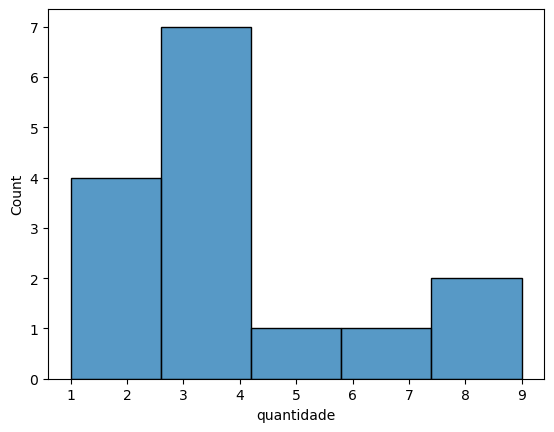

In [35]:
sb.histplot(Clientes_Alertas['quantidade'])

**Conclusão:** Dentre os clientes que tiveram maior numero de alertas gerados temos uma maior concentração entre 3 e 4 alertas.
Os cliente com maior incidencia de alertas deve ser priorizado durantes os processos de verificação pelo compliance da instituição.

## 04.04 Exemplo de Relatórios com Scatter Plot (Gráfico de Dispersão)

**Cenário:** Supondo que uma determinada instituição queira analisar a quantidade de suspeitas de Fraudes foram geradas por Produto.

Para isso valos realizar os passos abaixo:

In [3]:
#Cria a conexão com o SQL Server passando os parametros (Servidor, Usuário, Senha, Database)
conexao = sql.connect('servidor', 'usuario', 'senha', 'banco_de_dados')

# Chama a consulta ao banco de dados passando os parametros da conexao criada
dados = pd.read_sql_query("""select pr.nm_produto, count(*) as Qtd_alertas  from dbo.tgr_alertas al
join dbo.tpr_produto pr on al.cd_produto = pr.cd_produto 
where dt_movimentacao between '2020-06-01'
and '2020-06-30' 
group by al.cd_produto, pr.nm_produto
order by al.cd_produto""", conexao)

#Fecha conexão com banco de dados
conexao.close()

In [5]:
dados.head(10)

,nm_produto,Qtd_alertas
0,Conta Corrente,1858
1,Empréstimos,477
2,Corretora,1977
3,Fundos,98
4,CDB,2


In [7]:
#Importando biblioteca Matplotlib

import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [7]:
x = dados['nm_produto']
y = dados['Qtd_alertas']

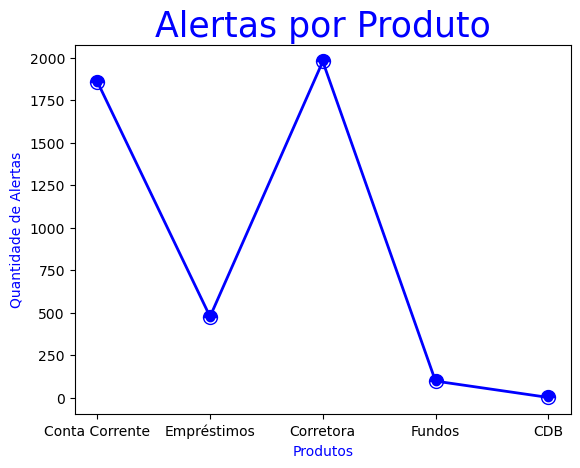

In [8]:
plt.xlabel('Produtos', c="blue")
plt.ylabel('Quantidade de Alertas', c="blue")
plt.title('Alertas por Produto', color = "blue", fontsize = 25)
plt.plot(x,y, c = "blue", ls = "-", lw = 2, marker = 'o', ms = 10, fillstyle = "top", mfc = "blue",
        label = "Primeiro")
plt.scatter(x, y, c="blue", ls = "-", lw = 1, marker = "o")

In [10]:
mov.head(10)

,nm_produto,qtd_movimentacoes
0,Conta Corrente,15138
1,Empréstimo,1096
2,Corretora,4129
3,Fundos,941
4,CDB,1016


In [5]:
x = mov['nm_produto']
y = mov['qtd_movimentacoes']

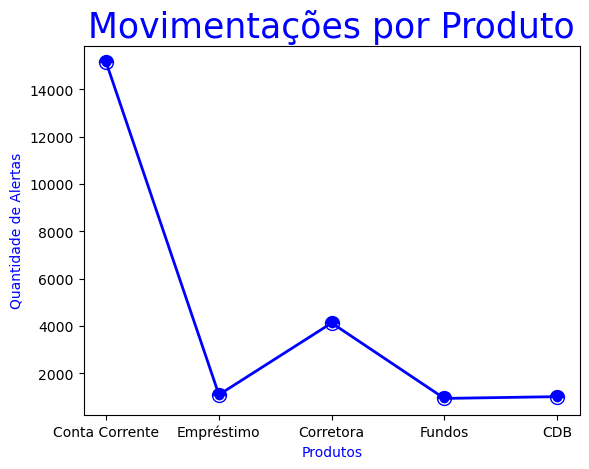

In [15]:
plt.xlabel('Produtos', c="blue")
plt.ylabel('Quantidade de Alertas', c="blue")
plt.title('Movimentações por Produto', color = "blue", fontsize = 25)
plt.plot(x,y, c = "blue", ls = "-", lw = 2, marker = 'o', ms = 10, fillstyle = "top", mfc = "blue",
        label = "Primeiro")
plt.scatter(x, y, c="blue", ls = "-", lw = 1, marker = "o")

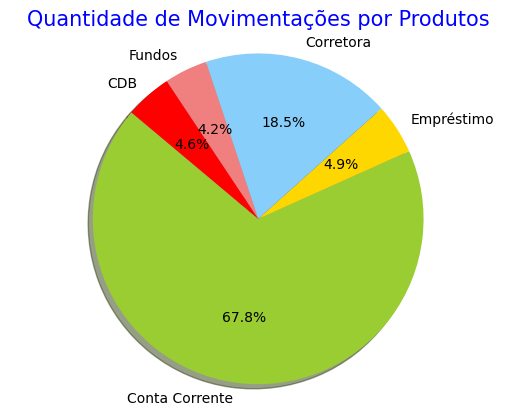

In [12]:
# Extrair as colunas relevantes do conjunto de dados
categorias = mov['nm_produto']
valores = mov['qtd_movimentacoes']

# definições
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']

# explodir 1ª fatia
explode = (0.1, 0, 0, 0)  

# Plot
plt.pie(valores, labels=categorias, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
 

# Criar o gráfico de pizza
# plt.pie(valores, labels=categorias)

# Adicionar título ao gráfico
plt.title('Quantidade de Movimentações por Produtos', color = "blue", fontsize = 15)

# Exibir o gráfico
plt.axis('equal')
plt.show()

In [18]:
#Correlação entre movimentações X quantidade de alertas

x  = dados['nm_produto']
y  = dados['Qtd_alertas']
y2 = mov['qtd_movimentacoes']


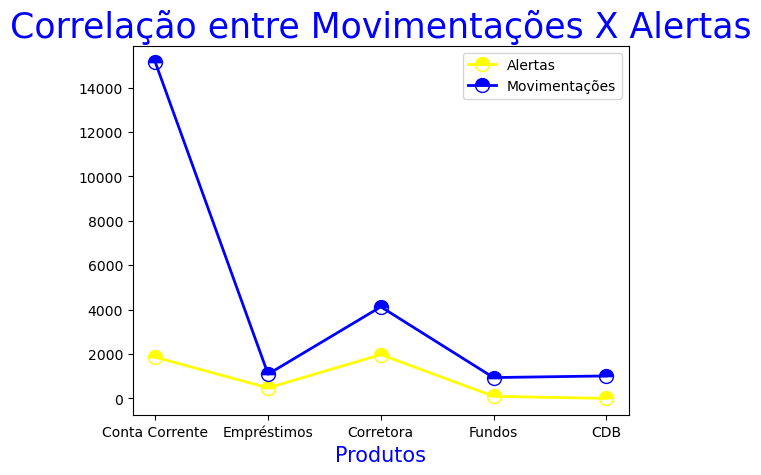

In [20]:
plt.plot(x,y, c = "yellow", ls = "-", lw = 2, marker = 'o', ms = 10, fillstyle = "top", mfc = "yellow", label = "Alertas")
plt.plot(x,y2, c = "blue", ls = "-", lw = 2, marker = 'o', ms = 10, fillstyle = "top", mfc = "blue", label = "Movimentações")

plt.title('Correlação entre Movimentações X Alertas', color = "blue", fontsize = 25)

#Primeira descrição
plt.xlabel("Produtos", color = "blue", fontsize = 15)
#Inserindo Legenda
plt.legend()

**Conclusão:** No cenário análisado temos uma correlação entre a quantidade de movimentações X a quantidade de alertas (suspeitas de fraude Financeira).

## 04.05 Exemplo de Relatórios com Seaborn

**Cenário:** Verificar quantidade de alertas por enquadramento.
Verificado apenas para o produto **Corretora**.

In [21]:
#Cria a conexão com o SQL Server passando os parametros (Servidor, Usuário, Senha, Database)
conexao = sql.connect('servidor', 'usuario', 'senha', 'banco_de_dados')

# Chama a consulta ao banco de dados passando os parametros da conexao criada
enquad = pd.read_sql_query("""select enq.cd_enquadramento, enq.nm_artigo, count(*) as Qtd_alertas  from dbo.tgr_alertas al
join dbo.tpr_produto pr on al.cd_produto = pr.cd_produto
join dbo.tpr_enquadramento enq on al.cd_enquadramento = enq.cd_enquadramento
where dt_movimentacao between '2020-06-01'
and '2020-06-30' and pr.cd_produto = 3 
group by enq.cd_enquadramento, enq.nm_artigo
order by enq.cd_enquadramento""", conexao)

#Fecha conexão com banco de dados
conexao.close()

In [22]:
enquad.head(20)

,cd_enquadramento,nm_artigo,Qtd_alertas
0,33,Movimentação incompatível com Renda/Fat.,74
1,35,Compra/Venda entre as mesmas contrapartes,63
2,36,Oscilação nos negócios,33
3,37,Mudança repentina nas operações,42
4,38,Perda ou ganho excessivo Outros Papéis,10
5,39,Perda ou ganho excessivo Opções,3
6,40,Oscilação de Negócios x Renda,2
7,42,Operações com Perda/Ganho Excessivos (Day Trade),20
8,44,Movimentação incompatível com Renda/Ocupação,16
9,45,Operações Incompatíveis com a Capacitação Técnica,87


<AxesSubplot:xlabel='cd_enquadramento', ylabel='Qtd_alertas'>

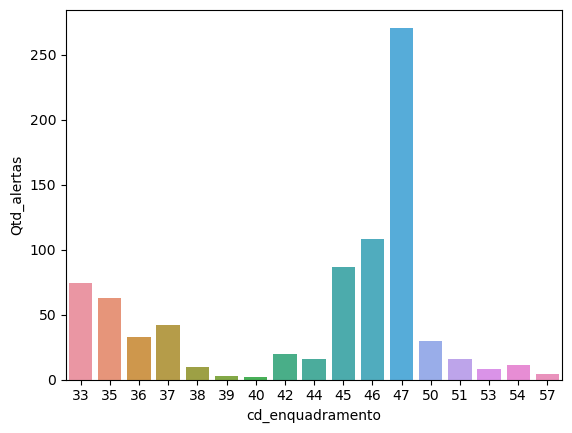

In [25]:
# Criar o gráfico de barras

sb.barplot(x='cd_enquadramento', y='Qtd_alertas', data=enquad)

**Conclusão:** Temos uma maior incidencia nos alertas.

<p>47 - Operações não Residentes 
<p>46 - Operações por Idade
<p>45 - Operações Incompatíveis com a Capacitação Técnica